In [95]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [96]:
Name0=[]
for dirname, _, filenames in os.walk('../input/animals10/raw-img'):
    Name0+=[dirname]

Name1=[]
for item in Name0:
    Name1+=[item[27:]]

Name2=[]
for item in Name1:
    if (item!=''):
        Name2+=[item]
                
Name3=sorted(Name2)
print(Name3)

[]


In [97]:
labels = open('./model/coco.names').read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'fish', 'tortoise']


In [98]:
Name3E=['dog','horse','elephant','butterfly','hen','cat','cow','sheep','spider','squirrel']

Name3Ex=[]
Name3Eo=[]
for item in Name3E:
    if item not in labels:
        Name3Ex+=[item]
    elif item in labels:
        Name3Eo+=[item]
        
print(Name3Ex)
print(Name3Eo)

['butterfly', 'hen', 'spider', 'squirrel']
['dog', 'horse', 'elephant', 'cat', 'cow', 'sheep']


In [99]:
weights_path = './model/yolov3.weights'
configuration_path = './model/yolov3.cfg'

probability_minimum = 0.5
threshold = 0.3

In [100]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]

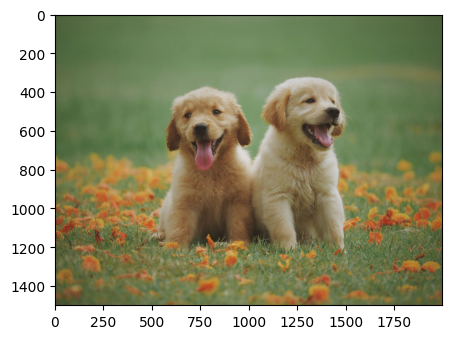

In [101]:
image_input = cv2.imread('./dog.jpg')

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [102]:
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [103]:
bounding_boxes = []
confidences = []
class_numbers = []
h,w = image_input.shape[:2]

for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center-(box_width/2))
            y_min = int(y_center-(box_height/2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

print(class_numbers)                  
print(labels[class_numbers[-1]])            

[16, 16, 16, 16, 16, 16, 16]
dog


In [104]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

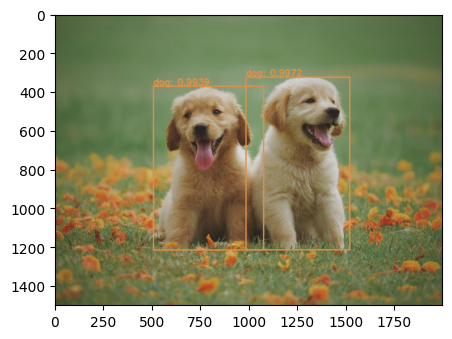

In [105]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [106]:
def ImagePath(path):
    
    bounding_boxes = []
    confidences = []
    class_numbers = []
    
    image_input = cv2.imread(path)
    blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
    blob_to_show = blob[0,:,:,:].transpose(1,2,0)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)
    h,w = image_input.shape[:2]

    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]
            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center-(box_width/2))
                y_min = int(y_center-(box_height/2))
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    %matplotlib inline
    plt.rcParams['figure.figsize'] = (5.0,5.0)
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    plt.show()
    
    labels2=[]
    for item in sorted(set(class_numbers)):
        labels2+=[labels[item]]
        
    return labels2

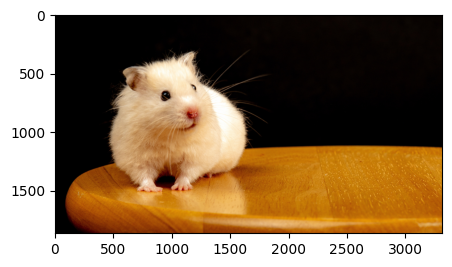

['cat', 'diningtable']

In [110]:
ImagePath('./hamster.jpg')

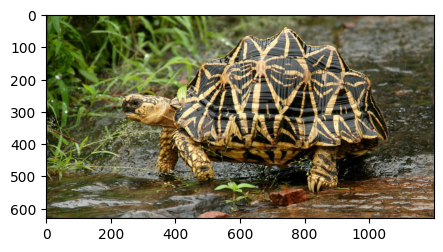

[]

In [108]:
ImagePath('./tortoise.jpg')

In [109]:
ImagePath('../input/animals10/raw-img/elefante/OIP--NEqn4JVnn251xGu7ss4bQHaHa.jpeg')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
ImagePath('../input/animals10/raw-img/farfalla/OIP--3xxJkezSkNzxrQaxlhv-QHaHa.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/gallina/1044.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/gatto/1001.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/mucca/OIP--DTVnqj-HKjAEvLxZyOYGQHaFP.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/pecora/OIP--CqWh6W1NLb76TYL4OCGAAHaFi.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/ragno/OIP--Bma656GiSO8H3qmvkDIzwHaE9.jpeg')

In [ ]:
ImagePath('../input/animals10/raw-img/scoiattolo/OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg')